In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import probplot, norm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [3]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [4]:
df_train = pd.read_csv("train.csv")


In [5]:
df_train.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df_train['SalePrice'].describe()


,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


<Axes: xlabel='SalePrice', ylabel='Count'>

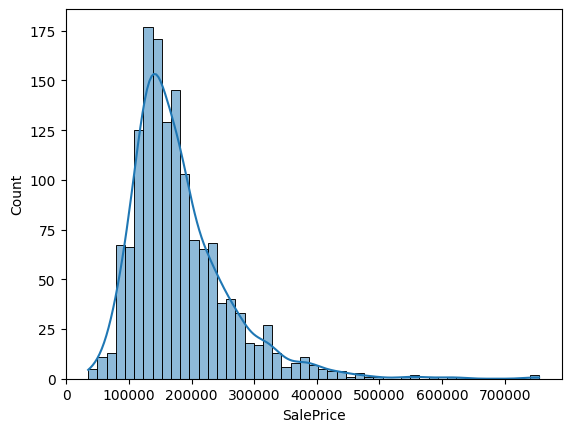

In [8]:
sns.histplot(df_train['SalePrice'], kde=True)


In [9]:
skew = df_train['SalePrice'].skew()
kurt = df_train['SalePrice'].kurt()

print(f"Skewness: {skew:.2f}")
print(f"Kurtosis: {kurt:.2f}")

Skewness: 1.88
Kurtosis: 6.54


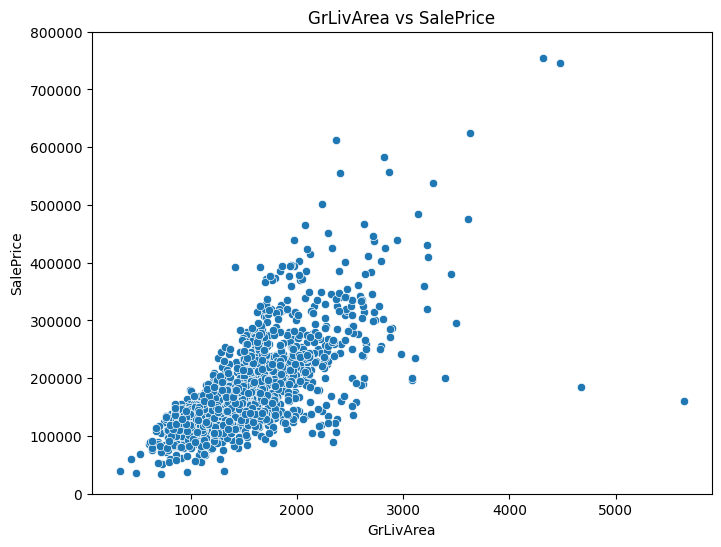

In [10]:
#scatter plot grlivarea/saleprice

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_train, x='GrLivArea', y='SalePrice')
plt.ylim(0, 800000)
plt.title('GrLivArea vs SalePrice')
plt.show()

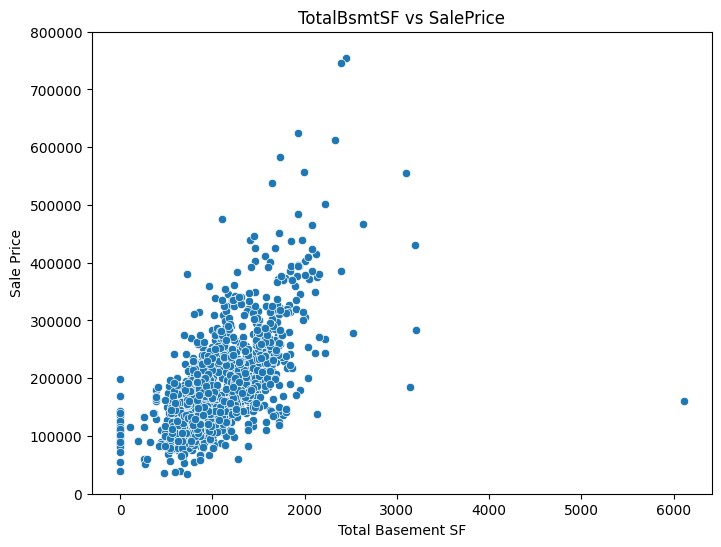

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_train, x='TotalBsmtSF', y='SalePrice')
plt.ylim(0, 800000)
plt.title('TotalBsmtSF vs SalePrice')
plt.xlabel('Total Basement SF')
plt.ylabel('Sale Price')
plt.show()

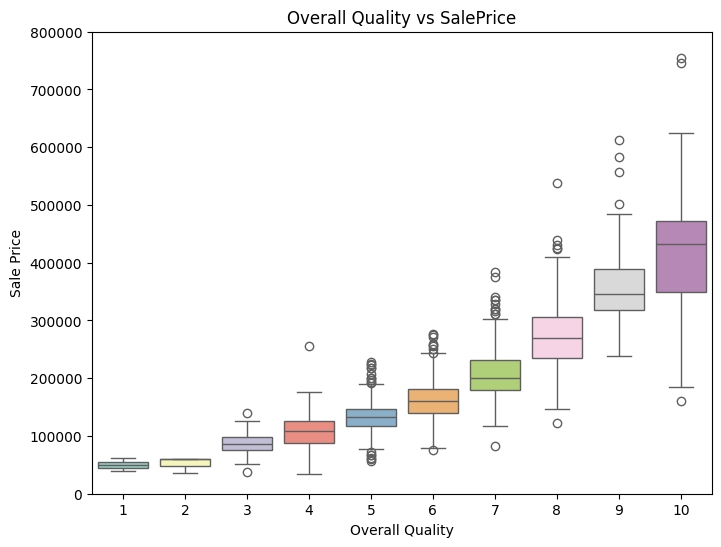

In [12]:
# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df_train,
    x='OverallQual',
    y='SalePrice',
    palette='Set3'
)
plt.ylim(0, 800000)
plt.title('Overall Quality vs SalePrice')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

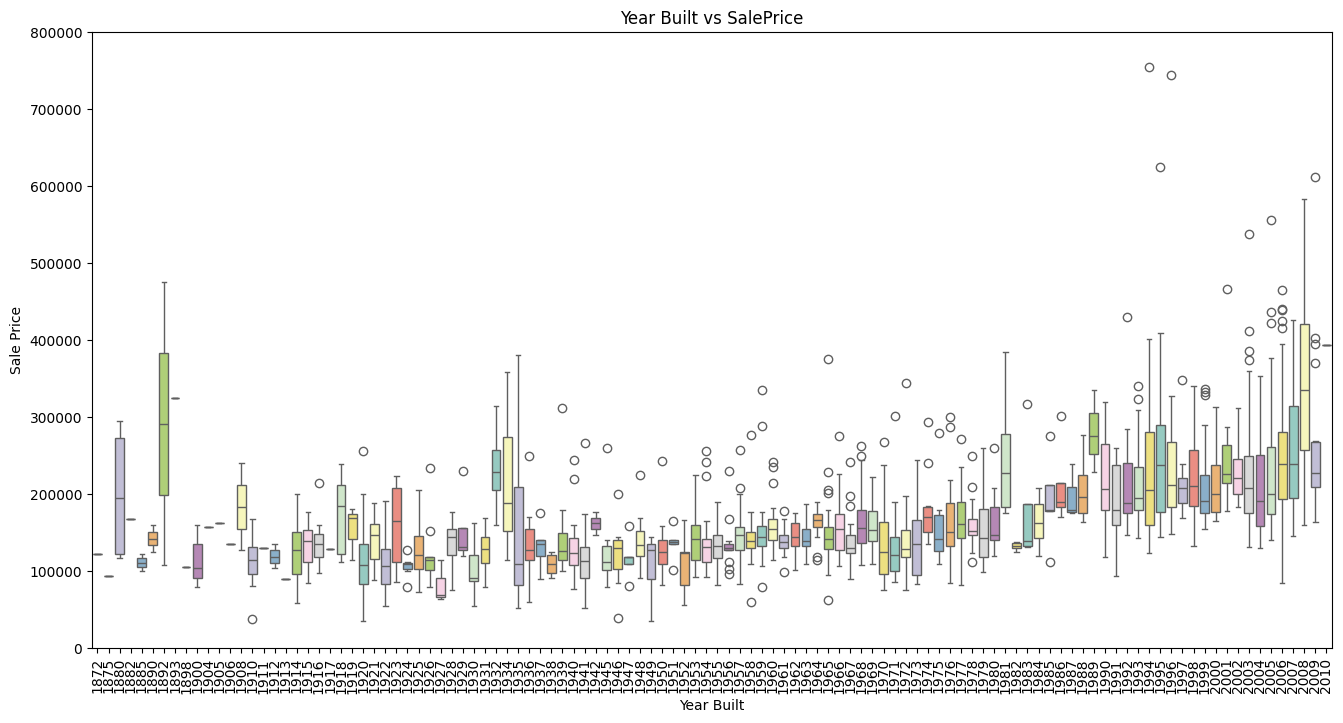

In [13]:
plt.figure(figsize=(16, 8))
sns.boxplot(
    data=df_train,
    x='YearBuilt',
    y='SalePrice',
    palette='Set3'
)
plt.ylim(0, 800000)
plt.title('Year Built vs SalePrice')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.xticks(rotation=90)
plt.show()

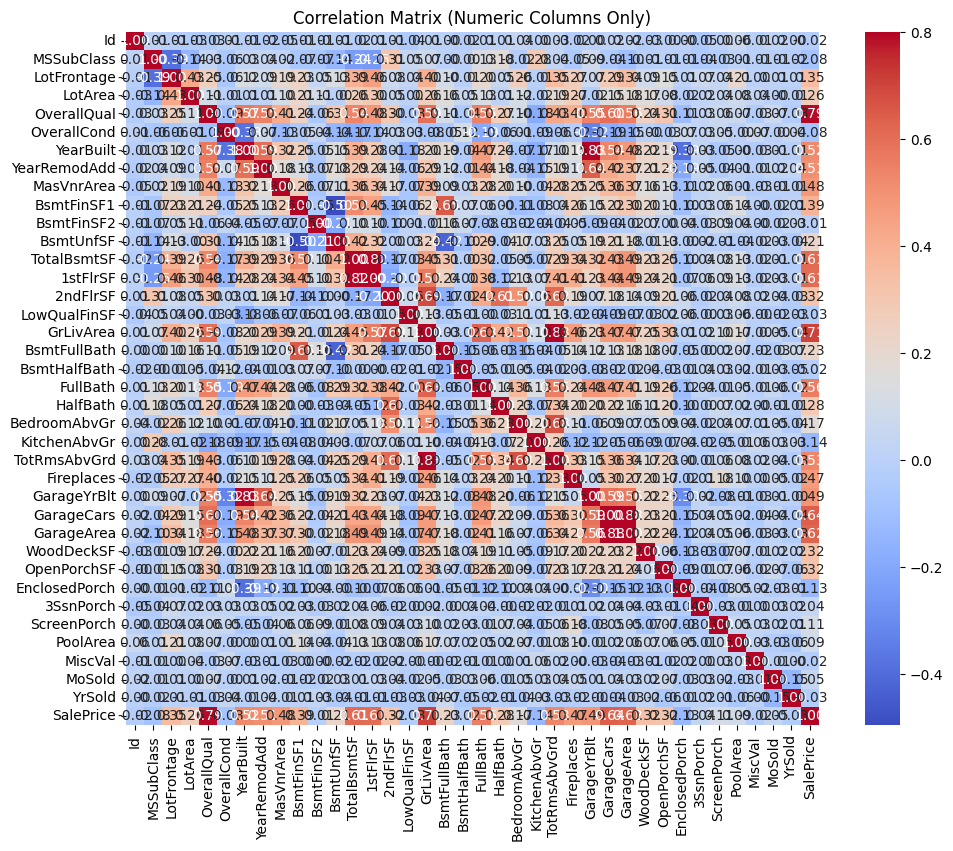

In [14]:
# Correlation matrix

numeric_df = df_train.select_dtypes(include=['float64', 'int64'])


corrmat = numeric_df.corr()

plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix (Numeric Columns Only)')
plt.show()

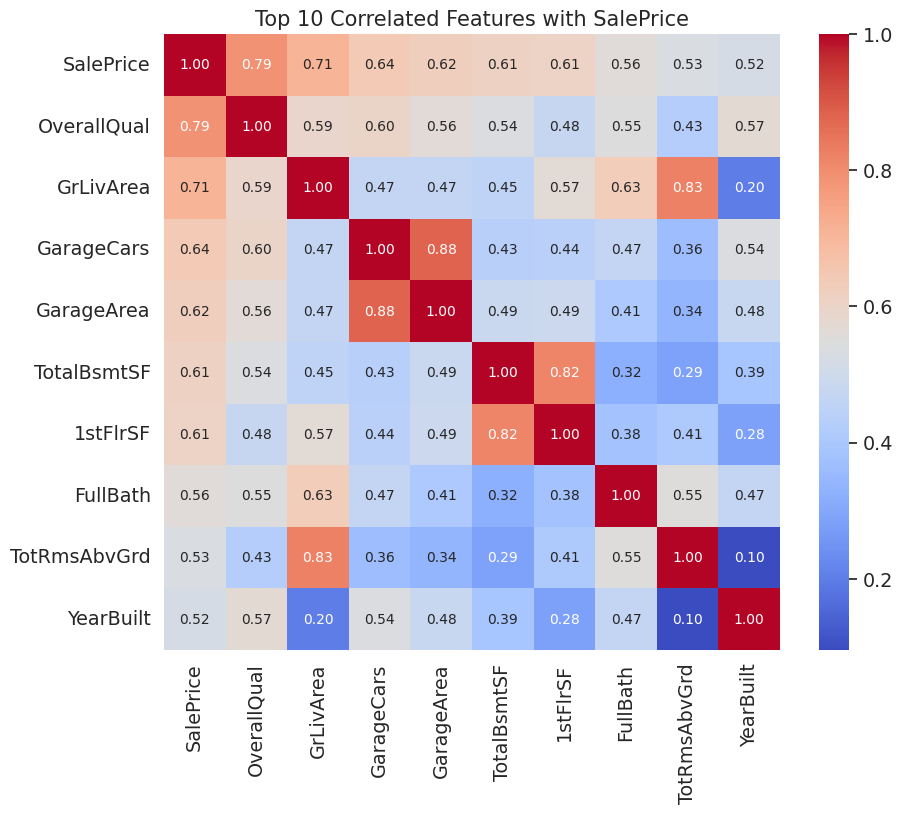

In [15]:
#'SalePrice' correlation matrix
numeric_df = df_train.select_dtypes(include=['float64', 'int64'])

corrmat = numeric_df.corr()

# Select top k features most correlated with SalePrice
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

# Compute correlation matrix for selected top k features
cm = numeric_df[cols].corr()

sns.set(font_scale=1.25)
plt.figure(figsize=(10, 8))

# Plot heatmap
hm = sns.heatmap(
    cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 10},
    yticklabels=cols.values,
    xticklabels=cols.values,
    cmap="coolwarm"  # Color palette
)

# Add title
plt.title(f'Top {k} Correlated Features with SalePrice')

# Show plot
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


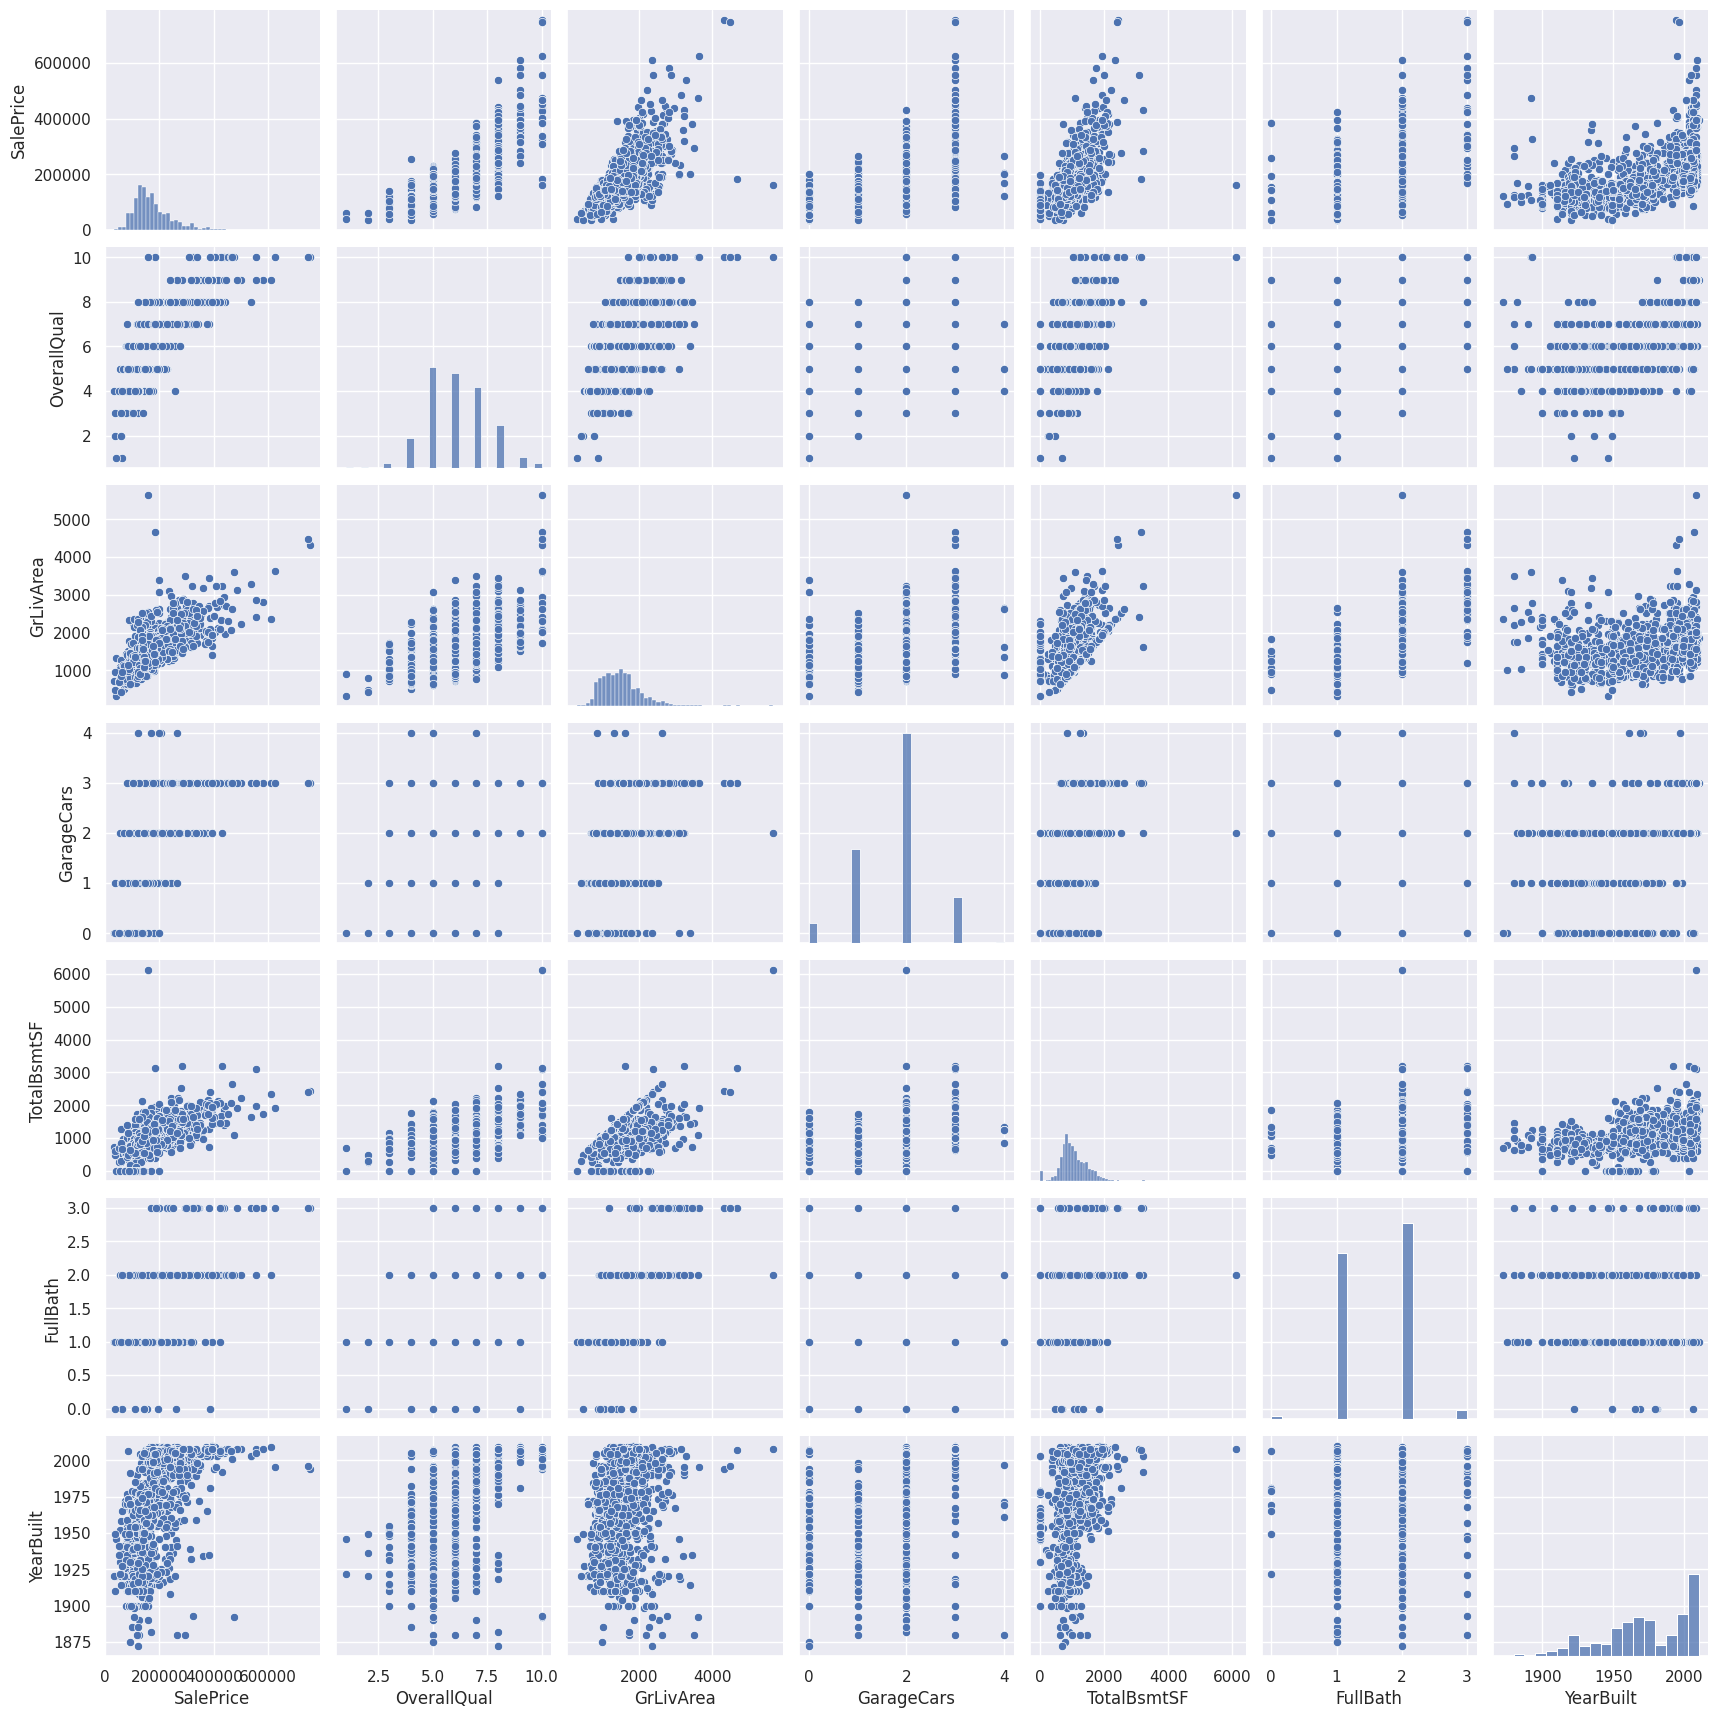

In [16]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

Missing Data


In [17]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageQual,81,0.055479
GarageFinish,81,0.055479
GarageType,81,0.055479


In [18]:
df_train = df_train.drop(labels=missing_data[missing_data['Total'] > 1].index, axis=1)

df_train = df_train.drop(df_train[df_train['Electrical'].isnull()].index)

df_train.isnull().sum().max()

0

In [20]:
# Standardizing 'SalePrice'
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'].values.reshape(-1, 1))

# Get 10 lowest and 10 highest values after scaling
low_range = saleprice_scaled[np.argsort(saleprice_scaled[:,0])][:10]
high_range = saleprice_scaled[np.argsort(saleprice_scaled[:,0])][-10:]

print('Outer range (low) of the distribution:')
print(low_range)

print('\nOuter range (high) of the distribution:')
print(high_range)

Outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

Outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


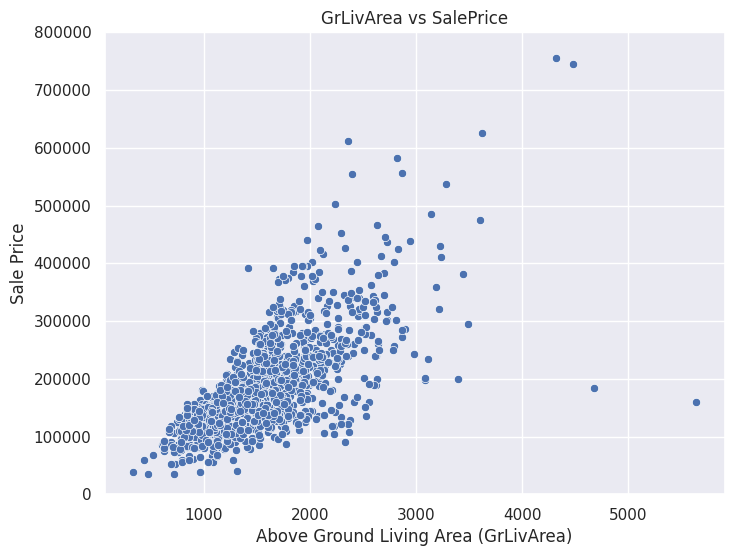

In [21]:
# Scatter plot: SalePrice vs GrLivArea
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_train, x='GrLivArea', y='SalePrice')
plt.ylim(0, 800000)
plt.title('GrLivArea vs SalePrice')
plt.xlabel('Above Ground Living Area (GrLivArea)')
plt.ylabel('Sale Price')
plt.show()

In [23]:
df_train.sort_values(by='GrLivArea', ascending=False).head(10)


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750
1182,1183,60,RL,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,555,0,7,2007,WD,Abnorml,745000
691,692,60,RL,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2007,WD,Normal,755000
1169,1170,60,RL,35760,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,7,2006,WD,Normal,625000
185,186,75,RM,22950,Pave,IR2,Lvl,AllPub,Inside,Gtl,...,0,0,410,0,0,6,2006,WD,Normal,475000
304,305,75,RM,18386,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2008,WD,Normal,295000
1268,1269,50,RL,14100,Pave,IR1,Lvl,AllPub,Inside,Mod,...,0,0,0,0,0,5,2008,WD,Normal,381000
635,636,190,RH,10896,Pave,Reg,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2007,WD,Abnorml,200000
769,770,60,RL,53504,Pave,IR2,HLS,AllPub,CulDSac,Mod,...,0,0,210,0,0,6,2010,WD,Normal,538000


In [24]:
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)


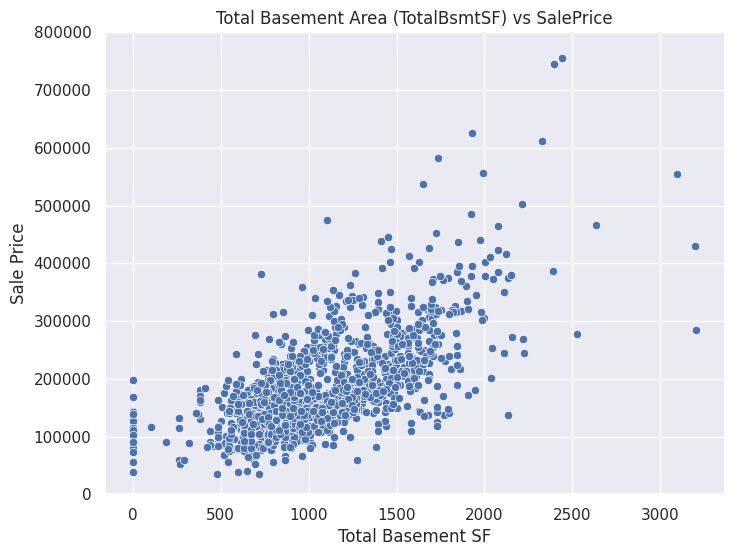

In [25]:
# Scatter plot: SalePrice vs TotalBsmtSF
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_train, x='TotalBsmtSF', y='SalePrice')
plt.ylim(0, 800000)
plt.title('Total Basement Area (TotalBsmtSF) vs SalePrice')
plt.xlabel('Total Basement SF')
plt.ylabel('Sale Price')
plt.show()

Mean = 180942.13864104325, Standard Deviation = 79494.27579351535


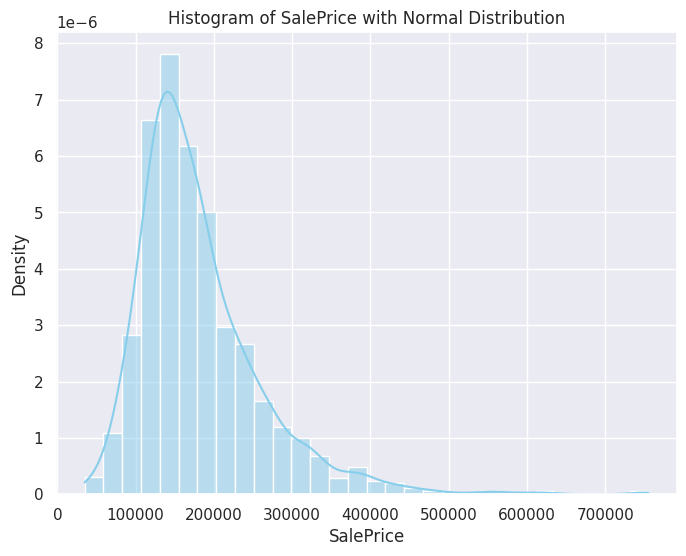

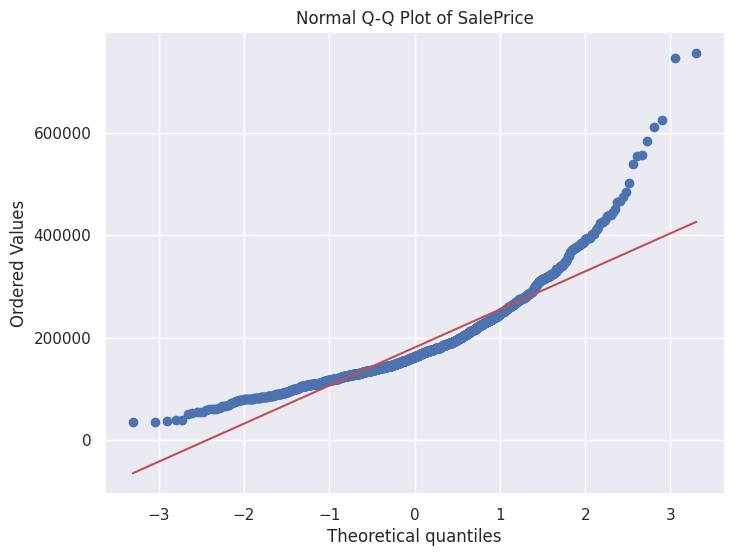

In [27]:
# Histogram with fitted normal distribution
plt.figure(figsize=(8,6))
sns.histplot(df_train['SalePrice'], kde=True, stat="density", bins=30, color='skyblue')
plt.title('Histogram of SalePrice with Normal Distribution')
plt.xlabel('SalePrice')
plt.ylabel('Density')

# Fit a normal distribution
(mu, sigma) = norm.fit(df_train['SalePrice'])
print(f"Mean = {mu}, Standard Deviation = {sigma}")

# Normal probability plot (Q-Q plot)
plt.figure(figsize=(8,6))
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.title('Normal Q-Q Plot of SalePrice')
plt.show()

In [28]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])


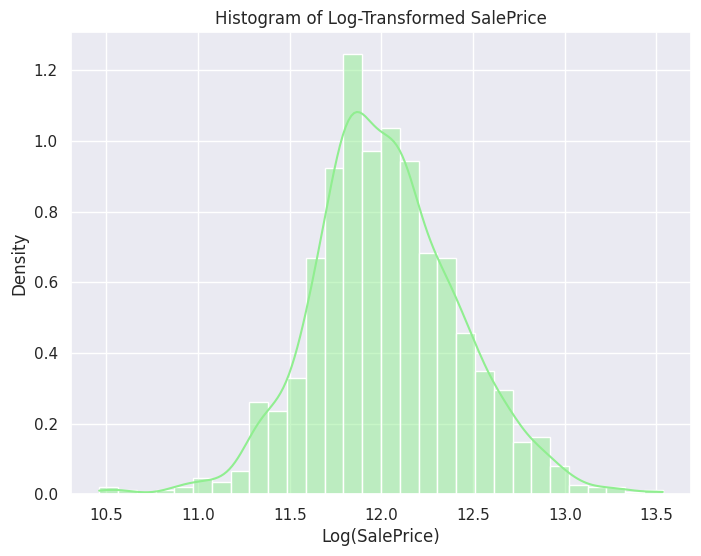

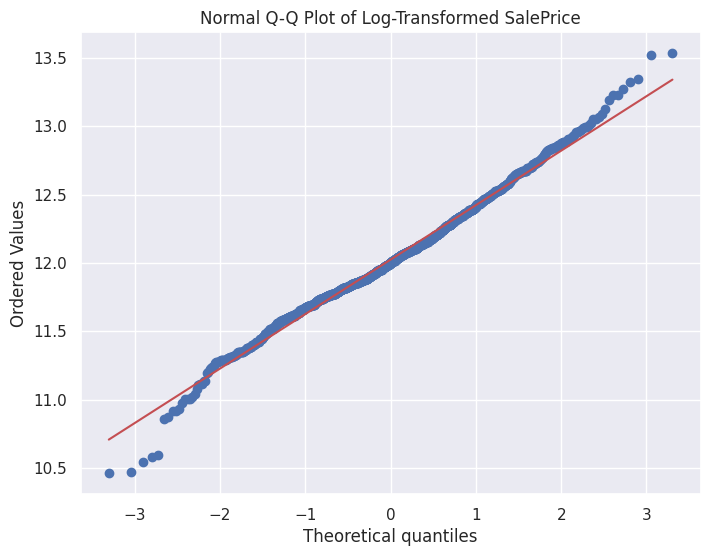

In [31]:
# Histogram
plt.figure(figsize=(8,6))
sns.histplot(df_train['SalePrice'], kde=True, stat="density", bins=30, color='lightgreen')
plt.title('Histogram of Log-Transformed SalePrice')
plt.xlabel('Log(SalePrice)')
plt.ylabel('Density')

# Q-Q plot
plt.figure(figsize=(8,6))
probplot(df_train['SalePrice'], plot=plt)
plt.title('Normal Q-Q Plot of Log-Transformed SalePrice')
plt.show()

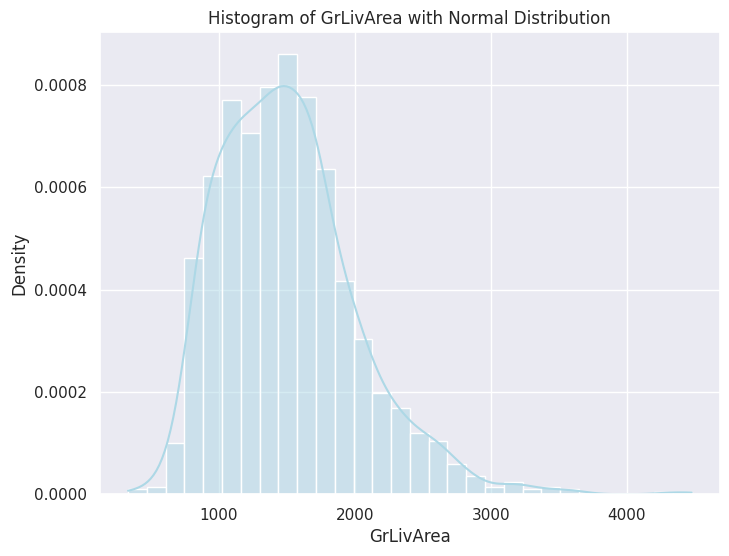

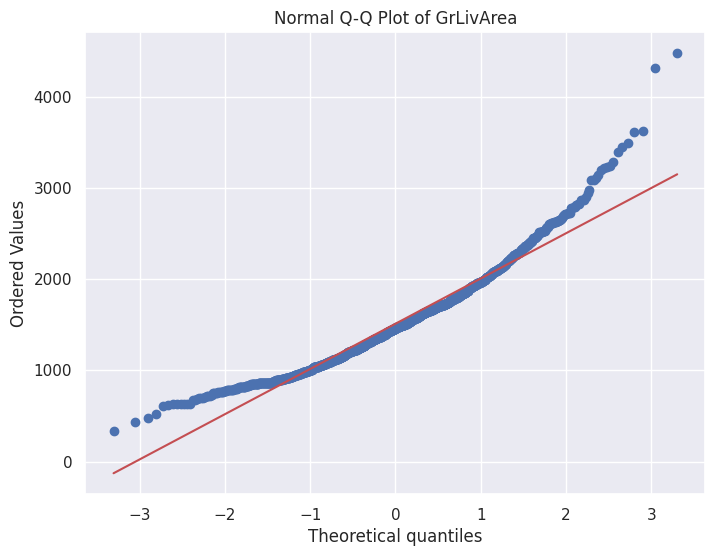

In [32]:
# Histogram with density curve
plt.figure(figsize=(8,6))
sns.histplot(df_train['GrLivArea'], kde=True, stat="density", bins=30, color='lightblue')
plt.title('Histogram of GrLivArea with Normal Distribution')
plt.xlabel('GrLivArea')
plt.ylabel('Density')

# Normal probability plot (Q-Q plot)
plt.figure(figsize=(8,6))
probplot(df_train['GrLivArea'], plot=plt)
plt.title('Normal Q-Q Plot of GrLivArea')
plt.show()

In [33]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])


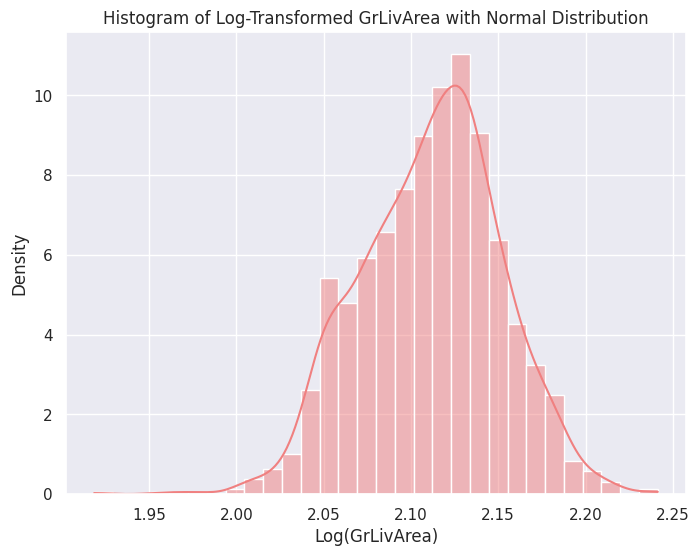

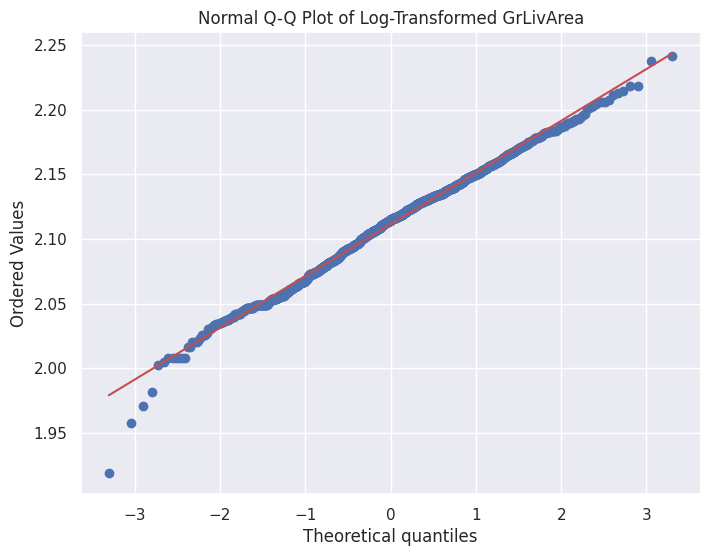

In [34]:
# Apply log transformation to GrLivArea
df_train['GrLivArea_log'] = np.log1p(df_train['GrLivArea'])

# Histogram with fitted normal distribution
plt.figure(figsize=(8,6))
sns.histplot(df_train['GrLivArea_log'], kde=True, stat="density", bins=30, color='lightcoral')
plt.title('Histogram of Log-Transformed GrLivArea with Normal Distribution')
plt.xlabel('Log(GrLivArea)')
plt.ylabel('Density')

# Normal probability plot (Q-Q plot)
plt.figure(figsize=(8,6))
probplot(df_train['GrLivArea_log'], plot=plt)
plt.title('Normal Q-Q Plot of Log-Transformed GrLivArea')
plt.show()

In [35]:
# log transformation to handle skewness (0 values safe)
df_train['TotalBsmtSF_log'] = np.log1p(df_train['TotalBsmtSF'])

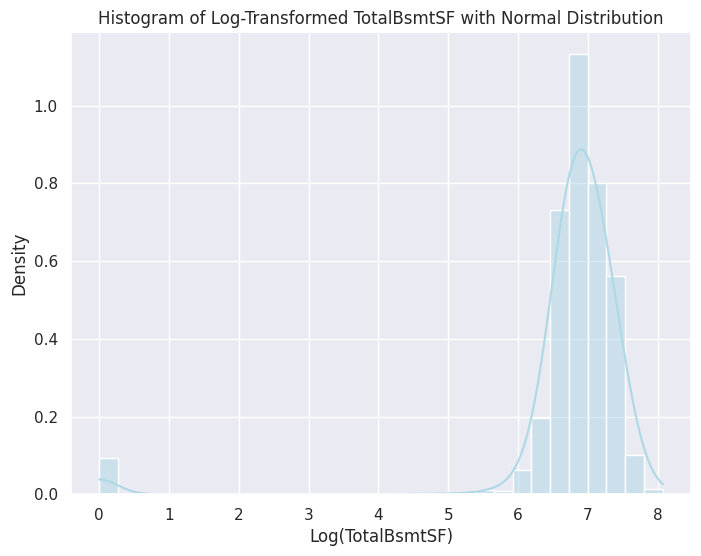

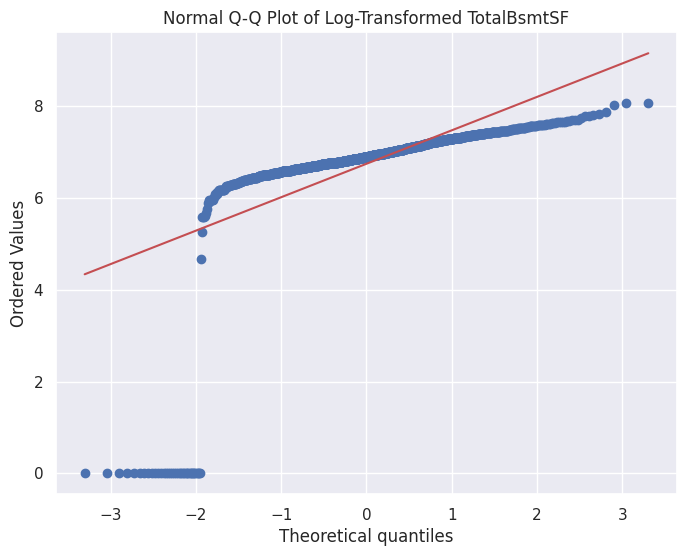

In [36]:

# Histogram with fitted normal distribution
plt.figure(figsize=(8,6))
sns.histplot(df_train['TotalBsmtSF_log'], kde=True, stat="density", bins=30, color='lightblue')
plt.title('Histogram of Log-Transformed TotalBsmtSF with Normal Distribution')
plt.xlabel('Log(TotalBsmtSF)')
plt.ylabel('Density')

# Normal probability plot (Q-Q plot)
plt.figure(figsize=(8,6))
probplot(df_train['TotalBsmtSF_log'], plot=plt)
plt.title('Normal Q-Q Plot of Log-Transformed TotalBsmtSF')
plt.show()

In [37]:
# Create binary variable HasBsmt: 1 if TotalBsmtSF > 0, else 0
df_train['HasBsmt'] = (df_train['TotalBsmtSF'] > 0).astype(int)

In [38]:
df_train.loc[df_train['HasBsmt']==1, 'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


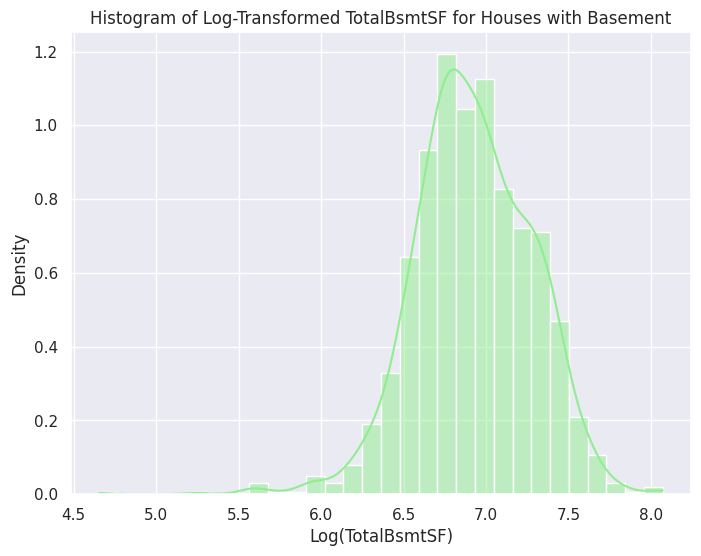

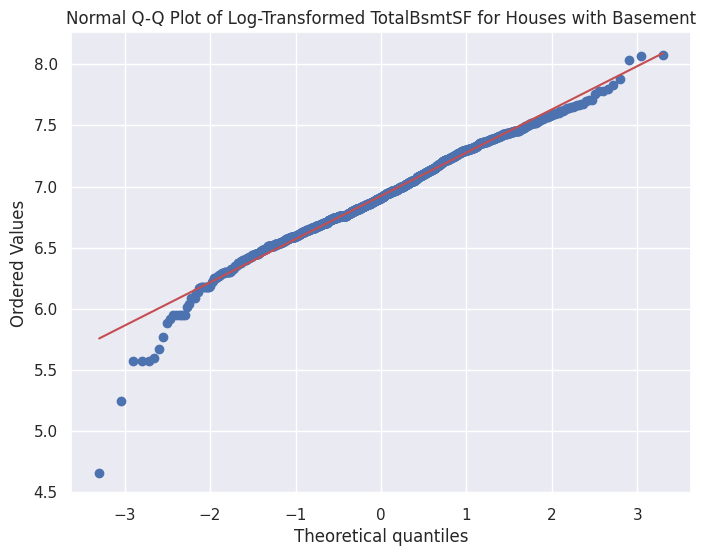

In [39]:
# Select only houses with basement (TotalBsmtSF > 0)
bsmt_data = df_train[df_train['HasBsmt']==1]['TotalBsmtSF']

# Histogram with fitted normal distribution
plt.figure(figsize=(8,6))
sns.histplot(bsmt_data, kde=True, stat="density", bins=30, color='lightgreen')
plt.title('Histogram of Log-Transformed TotalBsmtSF for Houses with Basement')
plt.xlabel('Log(TotalBsmtSF)')
plt.ylabel('Density')

# Normal probability plot (Q-Q plot)
plt.figure(figsize=(8,6))
probplot(bsmt_data, plot=plt)
plt.title('Normal Q-Q Plot of Log-Transformed TotalBsmtSF for Houses with Basement')
plt.show()

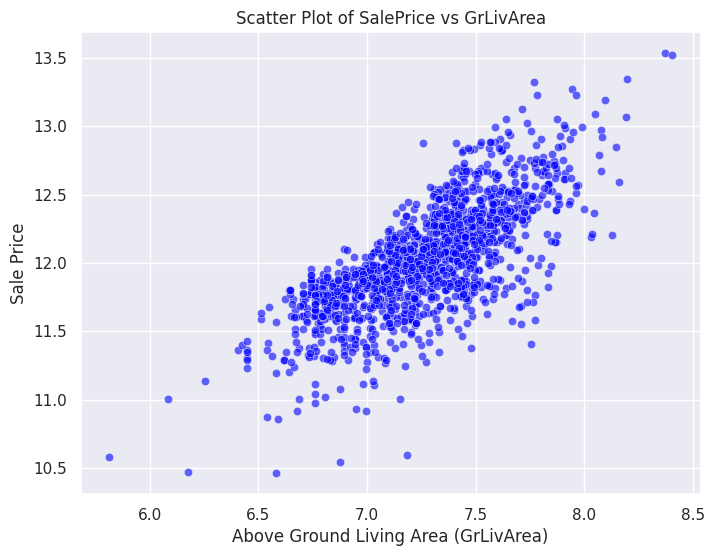

In [41]:
# Scatter plot: SalePrice vs GrLivArea
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_train, x='GrLivArea', y='SalePrice', color='blue', alpha=0.6)
plt.title('Scatter Plot of SalePrice vs GrLivArea')
plt.xlabel('Above Ground Living Area (GrLivArea)')
plt.ylabel('Sale Price')
plt.show()

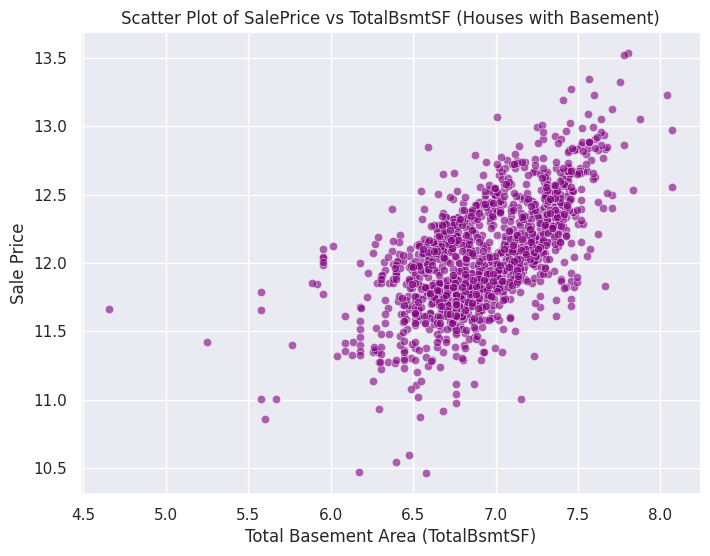

In [42]:
# Scatter plot for houses with basement
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_train[df_train['TotalBsmtSF'] > 0],
    x='TotalBsmtSF',
    y='SalePrice',
    color='purple',
    alpha=0.6
)
plt.title('Scatter Plot of SalePrice vs TotalBsmtSF (Houses with Basement)')
plt.xlabel('Total Basement Area (TotalBsmtSF)')
plt.ylabel('Sale Price')
plt.show()

In [43]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)

In [45]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train (1).csv


In [46]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Handling Missing Values

In [47]:
# Drop columns with too many missing values or low importance
drop_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
             'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
             'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
             'MasVnrArea', 'MasVnrType']

train = train.drop(columns=drop_cols, errors='ignore')
test = test.drop(columns=drop_cols, errors='ignore')

train = train.dropna(subset=['Electrical'])

# Fill remaining missing numeric values in test set with median
test.fillna(test.median(numeric_only=True), inplace=True)

Log Transformation of Target

In [48]:
train['SalePrice'] = np.log1p(train['SalePrice'])

Feature Engineering: HasBsmt

In [49]:
# Create binary feature indicating if house has a basement
train['HasBsmt'] = (train['TotalBsmtSF'] > 0).astype(int)
test['HasBsmt'] = (test['TotalBsmtSF'] > 0).astype(int)

# Apply log transformation for houses with basement
train.loc[train['HasBsmt']==1, 'TotalBsmtSF'] = np.log1p(train.loc[train['HasBsmt']==1, 'TotalBsmtSF'])
test.loc[test['HasBsmt']==1, 'TotalBsmtSF'] = np.log1p(test.loc[test['HasBsmt']==1, 'TotalBsmtSF'])

Converting Categorical Variables to Dummies

In [50]:
# One-hot encode categorical variables
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

# Align test set columns with train set
test = test.reindex(columns=train.drop(columns=['SalePrice']).columns, fill_value=0)

Feature-Target Split

In [51]:
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

Ridge and Gradient Boosting CV

In [66]:
# Ridge Regression with scaling
ridge_pipe = make_pipeline(StandardScaler(), Ridge(alpha=10))
ridge_scores = np.sqrt(-cross_val_score(ridge_pipe, X_numeric, y, scoring="neg_mean_squared_error", cv=5))
print("Ridge CV RMSE:", ridge_scores.mean())

# Gradient Boosting Regressor (tree-based, can handle numeric as is)
gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=4, random_state=42)
gbr_scores = np.sqrt(-cross_val_score(gbr, X_numeric, y, scoring="neg_mean_squared_error", cv=5))
print("Gradient Boosting CV RMSE:", gbr_scores.mean())

Ridge CV RMSE: 0.15616278499095843
Gradient Boosting CV RMSE: 0.12604766374479406


Train Best Model and Predict

In [68]:
# Fill remaining NaN values in X with median
X = X.fillna(X.median(numeric_only=True))

# Fit Gradient Boosting model on full training data
gbr.fit(X, y)

# Predict on test set
preds = gbr.predict(test)

# Convert predictions back from log scale
preds = np.expm1(preds)

In [69]:
submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': preds})
submission.to_csv('submission.csv', index=False)
submission.head()

,Id,SalePrice
0,1461,122310.717075
1,1462,152483.246053
2,1463,182834.496704
3,1464,190466.749040
4,1465,181902.706181


In [70]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>